In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [1]:
DIRECTORY = 'drive/MyDrive/Informatics/Sphere@mail.ru/NN/hw_03/'

In [2]:
# import os
# os.chdir(DIRECTORY)

# Лекция 3: Библиотеки для глубинного обучения. Примитивы фреймворка PyTorch. 

## На сегодняшней лекции мы разберем, зачем нужны фреймворки для глубинного обучения и как устроены базовые методы и классы PyTorch

In [3]:
import IPython
IPython.display.Image("pytorch.png")

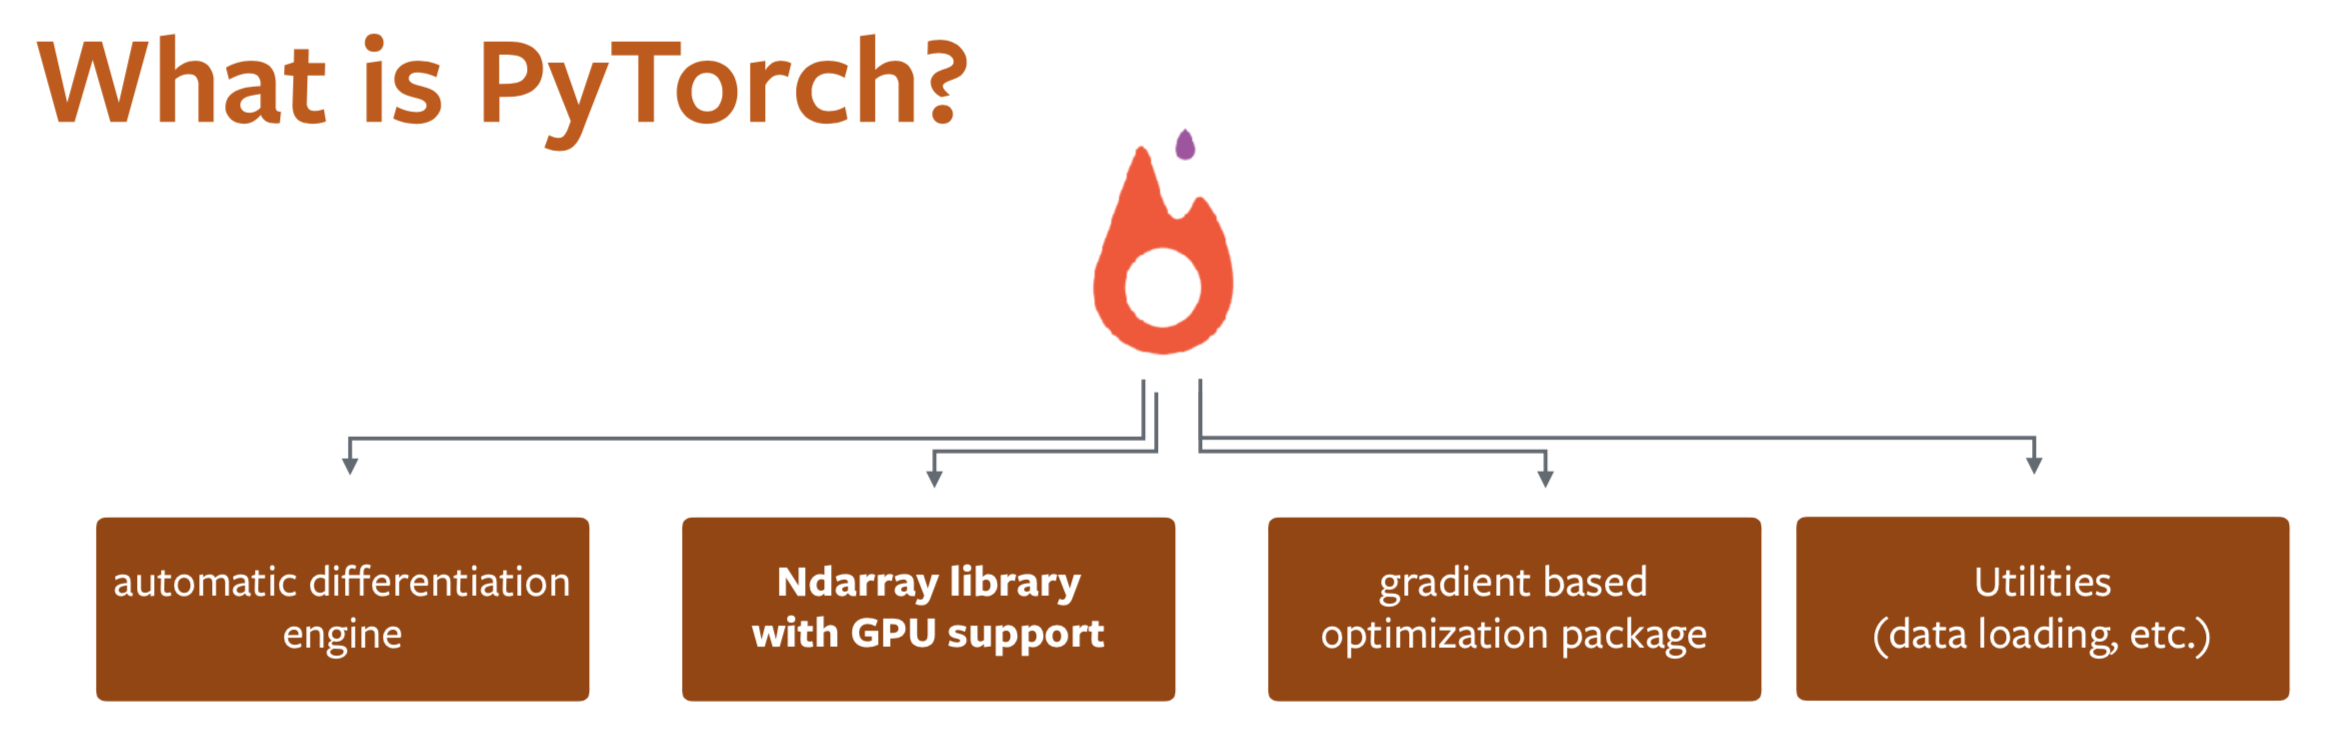

#        Пример обучения нейронной сети в numpy

In [4]:
# -*- coding: utf-8 -*-
import numpy as np

# N - размер батча; D_in - размерность входа;
# H - скрытая размероность; D_out размерность выхода.
N, D_in, H, D_out = 64, 1000, 100, 10

# Инициализируем вход и выход из нормального распределения
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Инициализируем веса из нормального распределения
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):

    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    
    # Используем функцию активации ReLU
    
    y_pred = h_relu.dot(w2)

    # Считаем функцию потерь
    loss = np.square(y_pred - y).sum()
    print(t, loss)

    # Считаем градиенты
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    
    # Считаем композицию с производной ReLU
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # Обновляем веса
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 30315259.690077167
1 26511743.914575696
2 28547889.481719933
3 31181543.89440142
4 30299381.847998403
5 23725735.427744742
6 14902403.848570663
7 7828362.728453326
8 3915361.451337764
9 2085564.7220796137
10 1272803.4227932077
11 887535.8253528392
12 680561.3607470412
13 551278.9941951744
14 459930.13569742726
15 390028.7764781087
16 334002.6631975116
17 288019.47731164366
18 249666.17602220405
19 217400.89904483984
20 190067.7511730989
21 166753.1168729566
22 146778.9124497558
23 129640.57765814627
24 114834.12594661949
25 101991.04350489678
26 90802.40619938135
27 81024.24079866568
28 72451.46734216876
29 64917.01368170217
30 58283.377461478536
31 52422.97015393611
32 47231.81602901781
33 42625.843431193905
34 38527.362209610066
35 34873.67299365501
36 31610.20343096639
37 28689.452302145226
38 26071.842300721793
39 23724.222145841755
40 21612.14310974074
41 19709.018114229715
42 17993.252129026354
43 16443.535010698677
44 15041.569278591745
45 13771.821418650485
46 12620.771510146

# Первая и основная составляющая типичного современного фреймворка для машинного обучения - Tensor

В интерфейсе базовых операций тензор ничем не отличается от __np.ndarray__, но при этом тензоры можно эффективно использовать при обучении на gpu. 

In [5]:
import torch

torch.__version__

'1.8.1+cu101'

In [6]:
# Создаем неинициализированный тензор
x = torch.Tensor(5, 3)

In [7]:
x

tensor([[-2.1683e+26,  3.0656e-41,  3.7835e-44],
        [ 0.0000e+00,         nan,  3.0656e-41],
        [ 1.3733e-14,  6.4069e+02,  4.3066e+21],
        [ 1.1824e+22,  4.3066e+21,  6.3828e+28],
        [ 3.8016e-39,  3.0656e-41, -6.4493e+25]])

In [8]:
# Типы
torch.FloatTensor
torch.LongTensor
torch.ByteTensor

torch.ByteTensor

In [9]:
x = torch.Tensor(5, 3).type(torch.FloatTensor)

In [10]:
# инициализируем тензор нормальным распределением
x = torch.randn(5, 3)

In [11]:
x

tensor([[-2.1642,  0.5390,  0.1319],
        [-1.1738,  0.3753,  0.7698],
        [ 0.4627, -1.4894,  0.5823],
        [-0.8350, -0.6125, -0.4269],
        [-0.3729,  1.3733, -2.0945]])

In [12]:
x.shape

torch.Size([5, 3])

In [13]:
x.size()

torch.Size([5, 3])

In [14]:
y = torch.rand(5, 3)

In [15]:
y

tensor([[0.7426, 0.5657, 0.2364],
        [0.2841, 0.7322, 0.6413],
        [0.8456, 0.3678, 0.7396],
        [0.7920, 0.3261, 0.6241],
        [0.9681, 0.9711, 0.2280]])

In [16]:
# Первый способ сложить 2 тензора
x + y

tensor([[-1.4216,  1.1046,  0.3682],
        [-0.8897,  1.1075,  1.4111],
        [ 1.3083, -1.1216,  1.3220],
        [-0.0429, -0.2864,  0.1972],
        [ 0.5951,  2.3444, -1.8665]])

In [17]:
# Второй способ сложить 2 тензора
x.add(y)

tensor([[-1.4216,  1.1046,  0.3682],
        [-0.8897,  1.1075,  1.4111],
        [ 1.3083, -1.1216,  1.3220],
        [-0.0429, -0.2864,  0.1972],
        [ 0.5951,  2.3444, -1.8665]])

In [18]:
# А еще можно так:
torch.add(x, y)

tensor([[-1.4216,  1.1046,  0.3682],
        [-0.8897,  1.1075,  1.4111],
        [ 1.3083, -1.1216,  1.3220],
        [-0.0429, -0.2864,  0.1972],
        [ 0.5951,  2.3444, -1.8665]])

In [19]:
# Сохраняем выход в тензор result
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)

tensor([[-1.4216,  1.1046,  0.3682],
        [-0.8897,  1.1075,  1.4111],
        [ 1.3083, -1.1216,  1.3220],
        [-0.0429, -0.2864,  0.1972],
        [ 0.5951,  2.3444, -1.8665]])

In [20]:
# Перевод из numpy в torch
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b) 

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [21]:
a = torch.randn(5, 3) 
b = torch.randn(3, 4)

In [22]:
# Матричное умножение

torch.mm(a,b)
a.mm(b)

tensor([[ 0.5782, -0.6586, -0.2275, -0.3733],
        [ 0.7066,  4.2177,  0.0223, -1.8626],
        [-0.0717,  2.8483, -0.7602, -0.9021],
        [ 0.3708, -1.1414,  0.7850,  0.1393],
        [-0.3979,  0.2079, -0.8846,  0.1387]])

In [23]:
# для python 3

a @ b

tensor([[ 0.5782, -0.6586, -0.2275, -0.3733],
        [ 0.7066,  4.2177,  0.0223, -1.8626],
        [-0.0717,  2.8483, -0.7602, -0.9021],
        [ 0.3708, -1.1414,  0.7850,  0.1393],
        [-0.3979,  0.2079, -0.8846,  0.1387]])

Поменяем пару строчек в обучении на __numpy__ и код уже можно запускать и на GPU. Например, __x = x.cuda()__

In [24]:
dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # GPU

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in).type(dtype)
y = torch.randn(N, D_out).type(dtype)

w1 = torch.randn(D_in, H).type(dtype)
w2 = torch.randn(H, D_out).type(dtype)

learning_rate = 1e-6
for t in range(500):

    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    loss = (y_pred - y).pow(2).sum()
    print(t, loss)

    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 tensor(28672438.)
1 tensor(25469354.)
2 tensor(26946114.)
3 tensor(28978792.)
4 tensor(28210020.)
5 tensor(23066846.)
6 tensor(15569744.)
7 tensor(8990085.)
8 tensor(4851274.5000)
9 tensor(2675342.5000)
10 tensor(1616012.6250)
11 tensor(1091789.6250)
12 tensor(812698.8125)
13 tensor(646764.4375)
14 tensor(536122.8750)
15 tensor(455096.0625)
16 tensor(391798.0938)
17 tensor(340284.8750)
18 tensor(297374.2500)
19 tensor(261128.7188)
20 tensor(230202.5781)
21 tensor(203618.4844)
22 tensor(180633.6250)
23 tensor(160662.8750)
24 tensor(143245.4844)
25 tensor(127999.6094)
26 tensor(114625.2656)
27 tensor(102846.0547)
28 tensor(92452.6719)
29 tensor(83251.8672)
30 tensor(75089.6250)
31 tensor(67829.9141)
32 tensor(61357.2891)
33 tensor(55576.3398)
34 tensor(50411.8984)
35 tensor(45785.2852)
36 tensor(41633.0859)
37 tensor(37897.9492)
38 tensor(34535.7500)
39 tensor(31503.1094)
40 tensor(28764.4258)
41 tensor(26288.9258)
42 tensor(24048.1445)
43 tensor(22016.7832)
44 tensor(20173.8965)
45 te

# Но самое важное в фреймворках - графы вычисления и автоматическое дифференцирование 

In [25]:
# Тензор так же может содержать в себе информацию о графе вычислений 
# (в прошлых версиях Pytorch был отдельный класс torch.autograd.Variable)

import torch
x = torch.ones(2, 2, requires_grad = True)
x  

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [26]:
x.data

tensor([[1., 1.],
        [1., 1.]])

In [27]:
x.grad

In [28]:
# производная операции, которая породила переменную.
x.grad_fn

In [29]:
x = x + 2

In [30]:
x

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [31]:
x.mean().backward()

# Задаем граф вычислений: #

In [32]:
y = x + 2
z = 2 * y * y
out = z.mean()
out

tensor(50., grad_fn=<MeanBackward0>)

In [33]:
# Запускаем бэкпроп
out.backward()

In [34]:
x.grad

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  """Entry point for launching an IPython kernel.


In [35]:
z.grad_fn

In [36]:
out.grad == None

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  """Entry point for launching an IPython kernel.


True

In [37]:
IPython.display.Image("diff.jpeg")

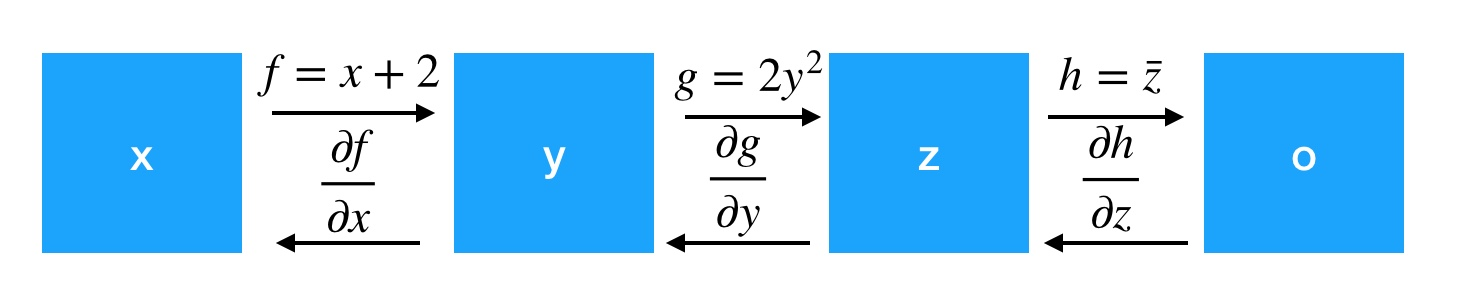

# Что произошло?

__autograd__ строит ациклический граф вычисления из переменных и операций (функций)

__out.backward__ проходит по всему графу начиная от вершины out и считает градиенты вершин

В __pyTorch__ начиная с версии 0.3 промежуточные градиенты не сохраняются.
Но если мы хотим все-таки увидеть их значения можно использовать
функцию __ Tensor.register_hook(print)__
или использовать __Tensor.retain_grad()__

In [38]:
from __future__ import print_function
x = torch.ones(2, 2, requires_grad = True)
y.register_hook(print)
y = x + 2
z = y * y * 2
z.register_hook(print)
out = z.mean()
out

tensor(18., grad_fn=<MeanBackward0>)

In [39]:
# Снова запускаем бэкпроп

out.backward()

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])


In [40]:
v = torch.randn(3, requires_grad=True)
v2 = v+1
v2.retain_grad()
v2.sum().backward()
v2.grad

tensor([1., 1., 1.])

Если мы хотим сохранить значения переменных в графе, то используем retain_graph = True. 
Это может быть нужно, если мы хотим несколько раз подряд сделать backprop

In [41]:
f = torch.Tensor([2,3]).requires_grad_()
g = f[0] * f[1]
g.backward(retain_graph=True)
print(f.grad)
g.backward()
print(f.grad)

tensor([3., 2.])
tensor([6., 4.])


In [42]:
f = torch.Tensor([2,3]).requires_grad_()
g = f[0] * f[1]
g.backward()
f.grad
g.backward()
f.grad

RuntimeError: ignored

In [43]:
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
y.backward(torch.ones(2, 2), retain_graph=True)
x.grad

tensor([[1., 1.],
        [1., 1.]])

__torch.autograd.Function__ - базовый класс дифференецируемых функций-составных частей графа вычислений

In [44]:
class MyReLU(torch.autograd.Function):

    def forward(self, input):
        # forward pass
        self.save_for_backward(input)
        return input.clamp(min=0)

    def backward(self, grad_output):
        # backward pass
        input, = self.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input

# Снова вернемся к исходной двухслойной сети

In [45]:
dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # GPU

N, D_in, H, D_out = 64, 1000, 100, 10


x = torch.randn(N, D_in).type(dtype)
y = torch.randn(N, D_out).type(dtype)


w1 = torch.randn(D_in, H, requires_grad=True).type(dtype)
w2 = torch.randn(H, D_out, requires_grad=True).type(dtype)

learning_rate = 1e-6
for t in range(500):
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    loss = (y_pred - y).pow(2).sum()
    print(t, loss.item())
    

    loss.backward()

    # С помощью torch.no_grad говорим pytorch, что следующие операции не нужно сохранять в графе
    with torch.no_grad():
        # Обнуляем градиенты
        if w1.grad is not None:
            w1.grad.data.zero_()
        if w2.grad is not None:
            w2.grad.data.zero_()
        
        # Делаем шаг градиентного спуска
        w1.data -= learning_rate * w1.grad.data
        w2.data -= learning_rate * w2.grad.data

0 29491060.0
1 29491060.0
2 29491060.0
3 29491060.0
4 29491060.0
5 29491060.0
6 29491060.0
7 29491060.0
8 29491060.0
9 29491060.0
10 29491060.0
11 29491060.0
12 29491060.0
13 29491060.0
14 29491060.0
15 29491060.0
16 29491060.0
17 29491060.0
18 29491060.0
19 29491060.0
20 29491060.0
21 29491060.0
22 29491060.0
23 29491060.0
24 29491060.0
25 29491060.0
26 29491060.0
27 29491060.0
28 29491060.0
29 29491060.0
30 29491060.0
31 29491060.0
32 29491060.0
33 29491060.0
34 29491060.0
35 29491060.0
36 29491060.0
37 29491060.0
38 29491060.0
39 29491060.0
40 29491060.0
41 29491060.0
42 29491060.0
43 29491060.0
44 29491060.0
45 29491060.0
46 29491060.0
47 29491060.0
48 29491060.0
49 29491060.0
50 29491060.0
51 29491060.0
52 29491060.0
53 29491060.0
54 29491060.0
55 29491060.0
56 29491060.0
57 29491060.0
58 29491060.0
59 29491060.0
60 29491060.0
61 29491060.0
62 29491060.0
63 29491060.0
64 29491060.0
65 29491060.0
66 29491060.0
67 29491060.0
68 29491060.0
69 29491060.0
70 29491060.0
71 29491060.0
72

# Наконец, в PyTorch базовые слои нейронных сетей уже реализованы.

### ``Sequential`` - последовательность базовых слоев и функций активаций
### ``Linear(input dimension, output dimension)`` - линейный слой
### ``torch.nn.ReLU``, ``torch.nn.Sigmoid``,``torch.nn.Tanh``, etc. - функции активации
### ``torch.nn.MSELoss`` - среднеквадратичная функция потерь.

In [46]:
N, D_in, D_latent, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in).type(dtype)
y = torch.randn(N, D_out).type(dtype)

model = torch.nn.Sequential(
          torch.nn.Linear(D_in, D_latent),
          torch.nn.ReLU(),
          torch.nn.Linear(D_latent, D_out),
        )

loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.item())
    

    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param.data -= learning_rate * param.grad.data

    model.zero_grad()

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


0 679.8627319335938
1 631.7086181640625
2 589.3176879882812
3 552.0726928710938
4 518.9207153320312
5 488.98480224609375
6 461.5576171875
7 436.4185485839844
8 413.0994567871094
9 391.3363952636719
10 370.9891357421875
11 351.8733825683594
12 333.76129150390625
13 316.57879638671875
14 300.1692199707031
15 284.5285949707031
16 269.54217529296875
17 255.26220703125
18 241.60279846191406
19 228.60336303710938
20 216.21803283691406
21 204.3819580078125
22 193.11129760742188
23 182.37362670898438
24 172.16201782226562
25 162.4107666015625
26 153.16802978515625
27 144.3816375732422
28 136.0284423828125
29 128.11135864257812
30 120.60824584960938
31 113.49714660644531
32 106.76885223388672
33 100.42298126220703
34 94.43550109863281
35 88.79788970947266
36 83.4996566772461
37 78.50450897216797
38 73.80137634277344
39 69.38402557373047
40 65.2297134399414
41 61.32087326049805
42 57.651222229003906
43 54.21042251586914
44 50.987266540527344
45 47.95930099487305
46 45.116668701171875
47 42.44795

In [47]:
loss_fn(model(x), y)

tensor(2.0951e-06, grad_fn=<MseLossBackward>)

# А еще в PyTorch есть уже готовые оптимизаторы, такие как GD, SGD, ADAM, etc.

In [48]:
N, D_in, D_latent, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in).type(dtype)
y = torch.randn(N, D_out).type(dtype)

model = torch.nn.Sequential(
          torch.nn.Linear(D_in, D_latent),
          torch.nn.ReLU(),
          torch.nn.Linear(D_latent, D_out),
        )

loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.item())

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


0 658.4517211914062
1 641.4874877929688
2 625.0166015625
3 609.0096435546875
4 593.5134887695312
5 578.507080078125
6 563.998291015625
7 549.8929443359375
8 536.2359008789062
9 522.9234619140625
10 509.9723815917969
11 497.44122314453125
12 485.30499267578125
13 473.52996826171875
14 462.05401611328125
15 450.8580017089844
16 440.04779052734375
17 429.50390625
18 419.2095947265625
19 409.1708984375
20 399.43414306640625
21 389.9549560546875
22 380.71319580078125
23 371.6829833984375
24 362.90191650390625
25 354.36083984375
26 346.0248107910156
27 337.91339111328125
28 330.0249328613281
29 322.33941650390625
30 314.8626403808594
31 307.5201721191406
32 300.34033203125
33 293.3385925292969
34 286.48291015625
35 279.7970275878906
36 273.27435302734375
37 266.8925476074219
38 260.6463623046875
39 254.54122924804688
40 248.56837463378906
41 242.71107482910156
42 236.97181701660156
43 231.32861328125
44 225.79971313476562
45 220.37460327148438
46 215.05154418945312
47 209.8272705078125
48 20

In [49]:
sgd = torch.optim.SGD
adadelta = torch.optim.Adadelta
adagrad = torch.optim.Adagrad
rmsprop = torch.optim.RMSprop

# Сохранение и загрузка модели

In [50]:
# Сохранение

def save_checkpoint(state, filename='checkpoint.pth.tar'):
    torch.save(state, filename)
epoch =1    
save_checkpoint({
            'epoch': epoch,
            'state_dict': model.state_dict(),
            'optimizer' : optimizer.state_dict(),
        })

In [51]:
# Пример загрузки

checkpoint = torch.load('checkpoint.pth.tar')
start_epoch = checkpoint['epoch']
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

# Модели с произвольно сложной архитектурой

### ``Module`` - базовый класс для динамического графа вычислений. Это может быть как полный граф, так и один слой сети.


In [52]:
from torch import nn

In [53]:
class LinearLayer(nn.Module):
    def __init__(self, in_sz, out_sz):
        super().__init__()
        t1 = torch.randn(in_sz, out_sz)
        self.w = nn.Parameter(t1)
        t2 = torch.randn(out_sz)
        self.b = nn.Parameter(t2)
    def forward(self, activations):
        t = torch.mm(activations, self.w)
        return t + self.b

### Parameter - специальный подкласс класса Tensor, при добавлении Parameter в аттрибуты класса Module он автоматически добавляется в список параметров модуля (parameters() )

In [54]:
class FullBasicModel(nn.Module): 
    def __init__(self):
        super().__init__()
        self.fc1 = LinearLayer(128, 10)
        self.fc2 = LinearLayer(10, 10)
    def forward(self, x):
        t1 = self.fc1(x)
        t2 = nn.functional.relu(t1)
        t3 = self.fc2(t2)
        return nn.functional.softmax(t3)

## Datasets and Dataloaders

Важная составляющая машинного обучения - работа с данными (загрузка, предобработка, аугментация). 


__PyTorch__ имеет встроенные средства для этих операций.


Разберем эти операции на примере датасета особых точек лица, находить которые мы будем учиться на семинаре.


Примеры особых точек


left_eye_center, right_eye_center, left_eye_inner_corner, left_eye_outer_corner, right_eye_inner_corner, right_eye_outer_corner, left_eyebrow_inner_end, left_eyebrow_outer_end, right_eyebrow_inner_end, right_eyebrow_outer_end, nose_tip, mouth_left_corner, mouth_right_corner, mouth_center_top_lip, mouth_center_bottom_lip

Image name: 1466.jpeg
Landmarks shape: (68, 2)
First 4 Landmarks: [[ 1. 34.]
 [-1. 45.]
 [ 0. 56.]
 [ 1. 66.]]


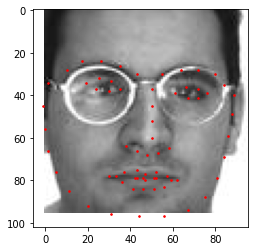

In [56]:
%matplotlib inline
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

landmarks_frame = pd.read_csv(DIRECTORY + 'dataset/train/face_landmarks.csv')

n = 500
img_name = landmarks_frame.iloc[n, 0]
landmarks = landmarks_frame.iloc[n, 1:].to_numpy().astype('float')
landmarks = landmarks.reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image, cmap='gray')
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  

plt.figure()
show_landmarks(io.imread(os.path.join(DIRECTORY + 'dataset/train/', img_name)),
               landmarks)
plt.show()

Dataset class
-------------

``torch.utils.data.Dataset`` -- абстрактный класс представляющий датасет. 


Для нового класса датасета нужно отнаследоваться от класса Dataset и реализовать следующие функции:


- ``__len__``  так что len(dataset) возвратит длину датасета.


- ``__getitem__``  - индексация, такая что dataset[i] возвратит i-й элемент




In [57]:
class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:].to_numpy().astype('float')
        landmarks = landmarks.reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

0 (96, 96) (68, 2)


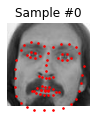

1 (96, 96) (68, 2)


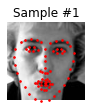

2 (96, 96) (68, 2)


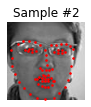

3 (96, 96) (68, 2)


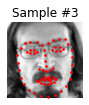

In [58]:
face_dataset = FaceLandmarksDataset(csv_file=DIRECTORY + 'dataset/train/face_landmarks.csv',
                                    root_dir=DIRECTORY + 'dataset/train')

fig = plt.figure()

for i in range(len(face_dataset)):
    sample = face_dataset[i]

    print(i, sample['image'].shape, sample['landmarks'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)

    if i == 3:
        plt.show()
        break

Преобразования (transformations)
----------

Так как часто не все изображения одинакового размера, нужно уметь автоматически приводить их к таковому. Также полезно уметь увеличивать размер датасета (аугментация).

-  ``Rescale``: приведение к определенному размеру
-  ``RandomCrop``: случайный кроп изображения. (вариант аугментации)
-  ``ToTensor``: приведение к тензору




In [59]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or tuple): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'landmarks': landmarks}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        landmarks = landmarks - [left, top]

        return {'image': image, 'landmarks': landmarks}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']
 
        return {'image': torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}

Приведем изображение к 68x68 и вырежем случайную область 60x60

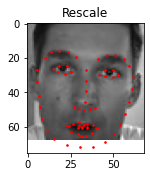

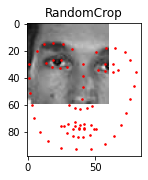

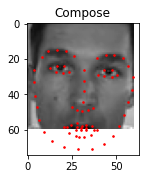

In [60]:
scale = Rescale(68)
crop = RandomCrop(60)
composed = transforms.Compose([Rescale(68),
                               RandomCrop(60)])

# Apply each of the above transforms on sample.
fig = plt.figure()
sample = face_dataset[65]
for i, tsfrm in enumerate([scale, crop, composed]):
    transformed_sample = tsfrm(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tsfrm).__name__)
    show_landmarks(**transformed_sample)

plt.show()

## Итерирование по датасету

In [61]:
transformed_dataset = FaceLandmarksDataset(csv_file=DIRECTORY + 'dataset/train/face_landmarks.csv',
                                           root_dir=DIRECTORY + 'dataset/train/',
                                           transform=transforms.Compose([
                                               Rescale(68),
                                               RandomCrop(60),
                                               ToTensor()
                                           ]))

for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['image'].size(), sample['landmarks'].size())

    if i == 3:
        break

0 torch.Size([60, 60]) torch.Size([68, 2])
1 torch.Size([60, 60]) torch.Size([68, 2])
2 torch.Size([60, 60]) torch.Size([68, 2])
3 torch.Size([60, 60]) torch.Size([68, 2])


Для эффективного обучения хотим иметь еще следующие возможности:

-  Батчи
-  Шаффлы
-  Параллельная загрузка

``torch.utils.data.DataLoader`` итератор, который делает все что нам нужно. 

0
1
2
3


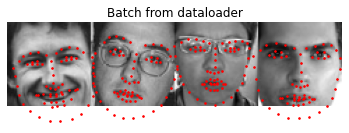

In [62]:
dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=4)


# Helper function to show a batch
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, landmarks_batch = \
            sample_batched['image'], sample_batched['landmarks']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose(1,0,2).reshape(im_size, -1), cmap="gray")

    for i in range(batch_size):
        plt.scatter(landmarks_batch[i, :, 0].numpy() + i * im_size,
                    landmarks_batch[i, :, 1].numpy(),
                    s=10, marker='.', c='r')

        plt.title('Batch from dataloader')

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch)

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

In [63]:
import pandas as pd

In [64]:
pd.read_csv(DIRECTORY + "dataset/train/face_landmarks.csv")

,image_name,part_0_x,part_0_y,part_1_x,part_1_y,part_2_x,part_2_y,part_3_x,part_3_y,part_4_x,part_4_y,part_5_x,part_5_y,part_6_x,part_6_y,part_7_x,part_7_y,part_8_x,part_8_y,part_9_x,part_9_y,part_10_x,part_10_y,part_11_x,part_11_y,part_12_x,part_12_y,part_13_x,part_13_y,part_14_x,part_14_y,part_15_x,part_15_y,part_16_x,part_16_y,part_17_x,part_17_y,part_18_x,part_18_y,part_19_x,...,part_48_x,part_48_y,part_49_x,part_49_y,part_50_x,part_50_y,part_51_x,part_51_y,part_52_x,part_52_y,part_53_x,part_53_y,part_54_x,part_54_y,part_55_x,part_55_y,part_56_x,part_56_y,part_57_x,part_57_y,part_58_x,part_58_y,part_59_x,part_59_y,part_60_x,part_60_y,part_61_x,part_61_y,part_62_x,part_62_y,part_63_x,part_63_y,part_64_x,part_64_y,part_65_x,part_65_y,part_66_x,part_66_y,part_67_x,part_67_y
0,0.jpeg,10,43,9,53,8,64,8,74,10,84,15,92,22,97,31,100,42,101,53,101,64,98,73,94,79,88,83,79,85,69,86,60,88,50,15,31,19,25,27,...,28,78,34,75,40,73,43,74,48,74,53,76,59,80,53,83,47,83,42,83,38,82,33,81,31,78,39,77,43,78,47,78,56,80,47,77,43,77,39,77
1,1.jpeg,9,32,8,42,9,52,12,62,15,72,21,80,27,88,34,95,42,97,51,96,58,91,64,85,70,77,75,68,78,58,81,48,82,38,17,24,22,21,29,...,34,75,38,72,43,70,46,71,49,70,52,72,55,76,52,80,48,83,45,83,42,82,38,79,36,75,42,74,46,75,48,74,53,76,48,77,46,77,42,77
2,10.jpeg,4,34,5,44,6,54,9,64,14,73,20,81,28,88,37,93,47,95,57,93,64,87,71,80,75,71,78,62,79,53,81,43,81,33,13,26,19,23,26,...,34,70,39,67,44,65,47,66,50,65,54,68,58,72,55,77,50,79,47,79,43,78,38,76,37,70,43,69,47,70,50,70,56,72,50,72,47,72,43,72
3,100.jpeg,12,41,13,51,15,60,17,70,21,78,27,85,34,90,43,93,52,94,61,92,68,87,75,81,79,72,81,63,82,54,82,44,82,34,17,32,22,26,29,...,38,74,42,71,47,69,50,70,53,69,58,69,62,71,59,75,55,77,51,78,47,78,43,77,40,74,47,72,51,72,54,72,61,71,54,73,51,73,47,73
4,1000.jpeg,8,46,9,55,10,64,12,73,16,82,22,88,31,93,40,95,50,96,59,96,68,93,75,88,80,80,83,71,84,62,85,53,85,43,14,31,18,24,26,...,37,69,41,64,46,63,50,64,54,63,59,65,64,70,59,74,54,75,50,75,46,75,41,73,39,68,46,65,50,65,54,65,62,70,54,72,50,72,46,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6216,994.jpeg,10,41,11,50,13,59,15,68,19,77,25,84,33,90,42,94,52,95,61,93,68,87,74,80,78,72,79,63,80,55,81,46,81,38,17,30,22,27,28,...,36,74,41,70,47,68,51,69,54,68,60,69,65,71,60,75,56,78,52,78,47,78,42,77,38,73,47,72,51,72,55,72,63,71,55,72,51,73,47,73
6217,995.jpeg,4,33,5,44,7,55,8,66,11,76,17,85,26,92,36,97,47,97,58,96,66,91,72,83,77,74,79,64,81,54,83,44,84,35,11,27,18,23,26,...,32,75,39,73,45,72,49,73,53,72,57,73,62,76,57,80,52,82,48,83,44,82,38,80,35,75,44,75,49,76,53,75,60,76,52,76,48,77,44,76
6218,997.jpeg,4,52,4,62,6,72,8,82,11,90,18,96,28,98,38,98,49,98,60,98,71,97,80,94,86,88,88,79,90,70,91,61,91,50,12,32,17,26,25,...,29,81,36,75,44,72,48,73,53,72,60,75,68,81,61,85,53,86,49,87,44,86,36,85,32,81,44,78,48,78,53,78,64,81,53,80,49,80,44,80
6219,998.jpeg,9,42,9,52,10,62,11,72,14,82,19,90,26,95,36,99,46,99,57,99,66,96,73,90,78,82,81,72,83,63,84,53,85,42,14,34,19,27,27,...,32,79,37,76,43,74,47,75,51,74,57,76,62,79,57,83,51,84,47,84,42,84,37,83,34,78,43,77,47,78,51,77,60,79,51,80,47,80,43,79


# More about CUDA

In [65]:
IPython.display.Image("comic.png")

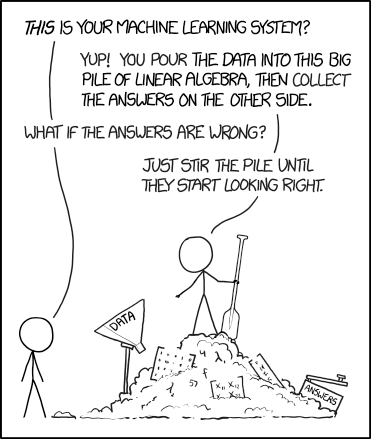

Благодаря своему устройству видеокарты позволяют параллельно выпонять огромное количество простых операций. (Single Instruction, Multiple Data (SIMD))

In [66]:
IPython.display.Image("cuda.png")

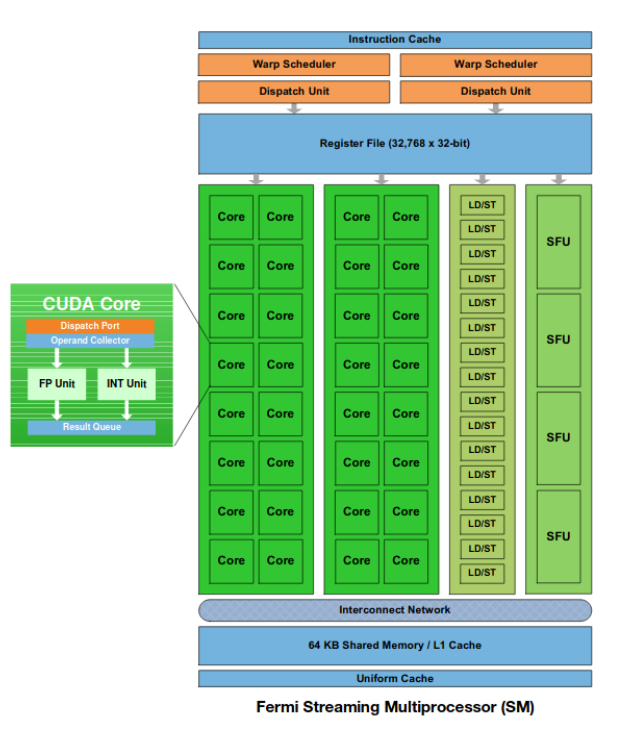

In [67]:
cuda = torch.device('cuda')     # Default CUDA device
cuda0 = torch.device('cuda:0')
cuda2 = torch.device('cuda:2')  # GPU 2 (these are 0-indexed)

x = torch.tensor([1., 2.], device=cuda0)
# x.device is device(type='cuda', index=0)
y = torch.tensor([1., 2.]).cuda()
# y.device is device(type='cuda', index=0)

with torch.cuda.device(1):
    # allocates a tensor on GPU 1
    a = torch.tensor([1., 2.], device=cuda)

    # transfers a tensor from CPU to GPU 1
    b = torch.tensor([1., 2.]).cuda()
    # a.device and b.device are device(type='cuda', index=1)

    # You can also use ``Tensor.to`` to transfer a tensor:
    b2 = torch.tensor([1., 2.]).to(device=cuda)
    # b.device and b2.device are device(type='cuda', index=1)

    c = a + b
    # c.device is device(type='cuda', index=1)

    z = x + y
    # z.device is device(type='cuda', index=0)

    # even within a context, you can specify the device
    # (or give a GPU index to the .cuda call)
    d = torch.randn(2, device=cuda2)
    e = torch.randn(2).to(cuda2)
    f = torch.randn(2).cuda(cuda2)
    # d.device, e.device, and f.device are all device(type='cuda', index=2)

RuntimeError: ignored

In [68]:
device = None
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Distributed data parallel

In [70]:
import torch.distributed.autograd as dist_autograd
from torch.nn.parallel import DistributedDataParallel as DDP
from torch import optim
from torch.distributed.optim import DistributedOptimizer
from torch.distributed.rpc import RRef

t1 = torch.rand((3, 3), requires_grad=True)
t2 = torch.rand((3, 3), requires_grad=True)
rref = rpc.remote("worker1", torch.add, args=(t1, t2))
ddp_model = DDP(my_model)

# Setup optimizer
optimizer_params = [rref]
for param in ddp_model.parameters():
    optimizer_params.append(RRef(param))

dist_optim = DistributedOptimizer(
    optim.SGD,
    optimizer_params,
    lr=0.05,
)

with dist_autograd.context() as context_id:
    pred = ddp_model(rref.to_here())
    loss = loss_func(pred, loss)
    dist_autograd.backward(context_id, loss)
    dist_optim.step()

TypeError: ignored

# Profiling

### В модуле ``torch.autograd.profiler`` реализованы методы для замера времени исполнения различных операций в PyTorch

In [71]:
x = torch.randn((2, 3), requires_grad=True)
a = torch.randn((3, 3), requires_grad=False)
with torch.autograd.profiler.profile() as prof:
    for _ in range(1000):
        y = (x @ a).norm()
        y.backward()

In [72]:
print(prof)

-----------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                               Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-----------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                       aten::matmul         0.06%      86.456us         0.63%     876.428us     876.428us             1  
                           aten::mm         0.56%     781.097us         0.57%     789.972us     789.972us             1  
                        aten::empty         0.01%       8.875us         0.01%       8.875us       8.875us             1  
               aten::frobenius_norm         0.09%     127.978us         3.36%       4.651ms       4.651ms             1  
                        aten::empty         0.00%       4.899us         0.00%       4.899us       4.899us             1  
                        

### Так же могут быть полезны утилиты ``cProfile``, ``torch.utils.bottleneck``,  ``snakeviz``

# Links

[Официальный набор примеров](https://pytorch.org/tutorials/)

[Pytorch distributed](https://pytorch.org/tutorials/beginner/dist_overview.html)

[Статья](https://arxiv.org/abs/1912.01703)

